In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
# load the dict from json
with open('../metabolightsbinarydatasets/studies_dict.json', 'r') as fp:
    studies_dict = json.load(fp)

# load file with the list of studise with m files but no raw data
with open('../metabolightsbinarydatasets/studies_with_mfiles_but_no_raw_data.txt', 'rb') as fp:
    lines = fp.readlines()
    for id_str in [line.decode('utf-8').strip()[5:] for line in lines]:
        studies_dict[id_str] = 'no raw data'

# load file with the list of studies with data but not enough data points
with open('../metabolightsbinarydatasets/studies_with_not_enough_data_points.txt', 'rb') as fp:
    lines = fp.readlines()
    for id_str in [line.decode('utf-8').strip()[5:] for line in lines]:
        studies_dict[id_str] = 'not enough points'

# load file with the list of studies with data but not enough data points
with open('../metabolightsbinarydatasets/studies_with_no_phenotype_to_predict.txt', 'rb') as fp:
    lines = fp.readlines()
    for id_str in [line.decode('utf-8').strip()[5:] for line in lines]:
        studies_dict[id_str] = 'no phenotype'


# load file with the list of studies with data but not enough data points
with open('../metabolightsbinarydatasets/studies_with_no_link_between_data_and_metadata.txt', 'rb') as fp:
    lines = fp.readlines()
    for id_str in [line.decode('utf-8').strip()[5:] for line in lines]:
        studies_dict[id_str] = 'no link between data and metadata'

metabolights_nb_of_studies = 7889
all_studies = list(range(1, metabolights_nb_of_studies+1))

studies_dict
studies_df = pd.DataFrame(index=all_studies)
studies_df['status'] = '?'
for key in studies_dict.keys():
    id = int(key)
    studies_df.loc[id, 'status'] = studies_dict[key]

studies_df

,status
1,dataset generated
2,not enough points
3,dataset generated
4,no phenotype
5,dataset generated
...,...
7885,not accessible
7886,not accessible
7887,not accessible
7888,not accessible


In [3]:
# load the dict from json
with open('../metabolightsbinarydatasets/datasets_description_dict.json', 'r') as fp:
    datasets_dict = json.load(fp)

datasets_df = pd.DataFrame(data=datasets_dict).T
print(datasets_df.shape)

(835, 11)


In [4]:
datasets_df.columns

Index(['id', 'file', 'n samples', 'n features', 'metadata column', '1 label',
       '0 label', 'Study Assay Technology Platform', 'affiliation',
       'release date', 'organism'],
      dtype='object')

In [ ]:
from config.config_local import results_dir_multivariate
from utils.utils_figures import get_experiments_results_big_df, get_best_univariate_dict, generate_meta_df
from utils.utils_figures import algo_to_col_dict

#metric, metricnameinunivariate = 'f1_score', 'f1_avg'
#metric, metricnameinunivariate = 'accuracy', 'accuracy_avg'
metric, metricnameinunivariate = 'balancedaccuracy', 'balancedaccuracy_avg'
#metric, metricnameinunivariate = 'mcc', 'mccscore_avg'

big_perf_df_file = f'big_perf_df_{metric}.csv'
if not os.path.exists(big_perf_df_file):
    big_perf_df = get_experiments_results_big_df(result_dir=results_dir_multivariate, metric=metric, nb_of_splits=8)
    big_perf_df.to_csv(f'big_perf_df_{metric}.csv')
big_perf_df = pd.read_csv(f'big_perf_df_{metric}.csv', index_col=0)


unique_datasets = big_perf_df['dataset'].unique()

In [6]:
big_perf_df

,algo,score,metric,type,split,dataset,bayesian_optimization_trials,n_nonzero_features,n_nodes,best_feature_id
0,XGBoost,0.5,balancedaccuracy,test,4,MTBLS413-CSFPOSmassspectrometryv2maf-Stage1HAT...,50,1,3.0,23.0
1,XGBoost,0.5,balancedaccuracy,train,4,MTBLS413-CSFPOSmassspectrometryv2maf-Stage1HAT...,50,1,3.0,23.0
2,GBtree,1.0,balancedaccuracy,test,4,MTBLS2015-MTBLS2015LCMSnegativehilicmetabolite...,50,73,310.0,61.0
3,GBtree,1.0,balancedaccuracy,train,4,MTBLS2015-MTBLS2015LCMSnegativehilicmetabolite...,50,73,310.0,61.0
4,SCMBoost,1.0,balancedaccuracy,test,4,MTBLS4013-MTBLS4013LCMSalternatingreversephase...,50,9,45.0,221.0
...,...,...,...,...,...,...,...,...,...,...
158567,GBtree,1.0,balancedaccuracy,train,3,MTBLS3233-MTBLS3233LCMSpositivereversephasemet...,50,58,453.0,8.0
158568,PLSDA,1.0,balancedaccuracy,test,3,MTBLS7623-MTBLS7623LCMSnegativereversephasemet...,50,131,131.0,21.0
158569,PLSDA,1.0,balancedaccuracy,train,3,MTBLS7623-MTBLS7623LCMSnegativereversephasemet...,50,131,131.0,21.0
158570,SVMrbf,0.8,balancedaccuracy,test,3,MTBLS2262-MTBLS2262LCMSpositivereversephasemet...,50,48,NaN,NaN


In [7]:

# replace 'balanced_accuracy' by 'balancedaccuracy'
big_perf_df['metric'] = big_perf_df['metric'].apply(lambda x: 'balancedaccuracy' if x == 'balanced_accuracy' else x)

big_perf_df['metric'].value_counts()

metric
balancedaccuracy    157824
Name: count, dtype: int64

In [8]:
best_univariate_dict = get_best_univariate_dict(datasets_names=unique_datasets, metric=metricnameinunivariate)

In [9]:
big_perf_df.dtypes

algo                             object
score                           float64
metric                           object
type                             object
split                             int64
dataset                          object
bayesian_optimization_trials      int64
n_nonzero_features                int64
n_nodes                         float64
best_feature_id                 float64
dtype: object

In [10]:
scores_df = big_perf_df[big_perf_df['metric'] == metric]
scores_df = scores_df[scores_df['type'] == 'test']
# restrict to score, algo and dataset columns
scores_df = scores_df[['score', 'algo', 'dataset']]

datasets_to_algo_df = scores_df.groupby(['dataset', 'algo']).mean().reset_index()


In [11]:
datasets_to_algo_df
# count nans in score column

n_algo_list = []
algos_occurences = []
all_algos = list(datasets_to_algo_df['algo'].unique())
print(all_algos)

for dataset_name in list(datasets_df.index):
    loc_df = datasets_to_algo_df[datasets_to_algo_df['dataset'] == dataset_name]
    n_algos = loc_df.shape[0]
    n_algo_list.append(n_algos)
    algos_occurences.extend(list(loc_df['algo']))
    if n_algos < 10:
        print(dataset_name, n_algos)
        print('algos missing', [a for a in all_algos if a not in list(loc_df['algo'])])


['AdaBoost', 'DT', 'ElasticNet', 'GBtree', 'PLSDA', 'RF', 'SCMBoost', 'SVMlinear', 'SVMrbf', 'XGBoost', 'rSCM', 'SCM']
MTBLS1-metaboliteprofilingNMRspectroscopyv2maf-diabetesmellitus-Control 0
algos missing ['AdaBoost', 'DT', 'ElasticNet', 'GBtree', 'PLSDA', 'RF', 'SCMBoost', 'SVMlinear', 'SVMrbf', 'XGBoost', 'rSCM', 'SCM']
MTBLS1-mtbl1rmsmetaboliteprofilingNMRspectroscopyv2maf-diabetesmellitus-Control 0
algos missing ['AdaBoost', 'DT', 'ElasticNet', 'GBtree', 'PLSDA', 'RF', 'SCMBoost', 'SVMlinear', 'SVMrbf', 'XGBoost', 'rSCM', 'SCM']
MTBLS3-mtbl3metaboliteprofilingmassspectrometryv2maf-geneknockoutDelta9-wildtypegeneric 0
algos missing ['AdaBoost', 'DT', 'ElasticNet', 'GBtree', 'PLSDA', 'RF', 'SCMBoost', 'SVMlinear', 'SVMrbf', 'XGBoost', 'rSCM', 'SCM']
MTBLS66-GCmetaboliteprofilingmassspectrometryv2maf-NZelitebreedingpool-othercultivars 9
algos missing ['PLSDA', 'SCMBoost', 'SVMrbf']


total datasets: 835


Text(0.5, 1.0, 'Number of algorithms per dataset')

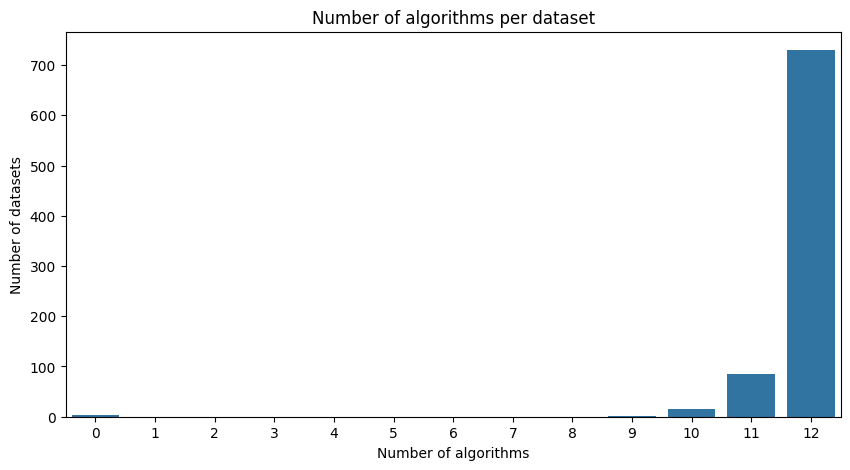

In [12]:
# bar plot of the number of algorithms per dataset
plt.figure(figsize=(10, 5))
# count occurences of each number in the list
x, y = [], []
for i in range(13):
    x.append(i)
    y.append(n_algo_list.count(i))

print('total datasets:', sum(y))

sns.barplot(x=x, y=y)
plt.xlabel('Number of algorithms')
plt.ylabel('Number of datasets')
plt.title('Number of algorithms per dataset')

ElasticNet 832
PLSDA 794
SVMlinear 832
SVMrbf 831
AdaBoost 832
SCMBoost 767
GBtree 830
XGBoost 831
DT 832
RF 832
SCM 819
rSCM 832


Text(0.5, 1.0, 'Number of datasets succesfully runned for each algorithm')

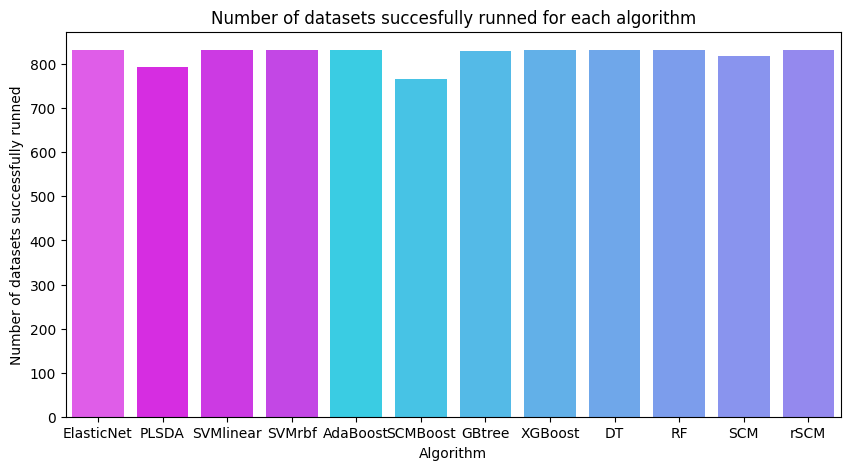

In [13]:
x, y = [], []
for algo in algo_to_col_dict.keys():
    print(algo, algos_occurences.count(algo))
    x.append(algo)
    y.append(algos_occurences.count(algo))

plt.figure(figsize=(10, 5))
sns.barplot(x=x, y=y, hue=x, palette=algo_to_col_dict)
plt.xlabel('Algorithm')
plt.ylabel('Number of datasets successfully runned')
plt.title('Number of datasets succesfully runned for each algorithm')

In [14]:
meta_df = generate_meta_df(big_perf_df, best_univariate_dict, datasets_df, metric)

In [15]:
# keep only the datasets with occurence in the big_perf_df
datasets_df['algorithms training'] = ['done' if dataset in unique_datasets else 'failed' for dataset in datasets_df.index]
print(datasets_df['algorithms training'].value_counts())
# keep only the datasets with occurence in the big_perf_df
datasets_df = datasets_df[datasets_df.index.isin(unique_datasets)]

algorithms training
done      832
failed      3
Name: count, dtype: int64


In [16]:
# add technique category column
meta_df['technique category'] = '?'

technique_category_dict = {
    'NMR':                                                  'NMR',
    'Nuclear Magnetic Resonance (NMR) -':                   'NMR',
    'NMR spectroscopy':                                     'NMR',
    'LCMS':                                                 'LCMS',
    'LC-MS':                                                'LCMS',
    'Q Exactive':                                           'LCMS',
    'QExactive (Thermo Scientific)':                        'LCMS',
    'Liquid Chromatography MS - negative - reverse phase':  'LCMS',
    'Liquid Chromatography MS - positive - reverse phase':  'LCMS',
    'API 4000 QTRAP (AB Sciex)':                            'LCMS',
    'Orbitrap Elite (Thermo Scientific)':                   'LCMS',
    'Agilent 7200 Accurate-Mass Q-TOF'  :                   'LCMS',
    'GC-MS':                                                'GCMS',
    'DSQ II Single Quadrupole GC/MS (Thermo Scientific)':   'GCMS',
    'Liquid Chromatography MS - negative - hilic':          'LCMS',
    'Liquid Chromatography MS - positive - hilic':          'LCMS',
    'Liquid Chromatography MS - negative':                  'LCMS',
    'Liquid Chromatography MS - positive':                  'LCMS',
    'Liquid Chromatography MS'  :                           'LCMS',
    'Liquid Chromatography MS - Positive (LC-MS (Positive))' : 'LCMS',
    'Liquid Chromatography MS - alternating - reverse phase': 'LCMS',
    'Liquid Chromatography MS - Negative (LC-MS (Negative))': 'LCMS',
    'Liquid Chromatography MS - Alternating (LC-MS (Alternating))': 'LCMS',
    'Liquid Chromatography MS - alternating' :             'LCMS',
    'LC-MS (Alternating)' :                                'LCMS',
    'Liquid Chromatography MS - negative - hilic' :          'LCMS',
    'Liquid Chromatography MS - negative - hilic     ':  'LCMS',
    'Liquid Chromatography MS - reverse phase' :          'LCMS',
    'Liquid Chromatography Tandem MS (LC-MS/MS)':        'LCMS',
    '6540 Q-TOF LC/MS (Agilent)':                          'LCMS',
    'Liquid Chromatography MS - POS - HILIC':              'LCMS',
    'Liquid Chromatography MS - alternating - hilic':       'LCMS',
    'Nuclear Magnetic Resonance (NMR)':                      'NMR',
    'Gas Chromatography MS - positive':                      'GCMS',
    'Gas Chromatography MS - negative':                      'GCMS',
    'Gas Chromatography MS':                                'GCMS',
    'GCMS':                                                 'GCMS',
    'Direct infusion MS - positive':                         'DIMS',
    'Direct infusion MS - negative':                         'DIMS',
    'Direct infusion MS':                                   'DIMS',
    'Agilent 6890 GC - LECO Pegasus III TOF MS (LECO)':	'GCMS',
    'UPLC Q-TOF Premier (Waters)':	'LCMS',
    'Bruker':	'other',
    'GCT Premier (Waters)':	'GCMS',
    'Xevo QTof MS (Waters)':	'LCMS',
    'Quattro micro API (Waters)':	'LCMS',
    'LTQ Orbitrap Velos (Thermo Scientific)':	'LCMS',
    'Bruker Esquire 6000':	'LCMS',
    'Leco Pegasus III':	'GCMS',
    'Bruker Daltonics esquire 3000':	'LCMS',
    'Acquity UPLC PDA':	'other', #LC
    'DSQ II Trace Ultra (Thermo Scientific)':	'GCMS',
    '5975C Series GC/MSD (Agilent)':	'GCMS',
    'Xevo G2 QTOF (Waters)':	'LCMS',
    'Q-Tof Premier (Waters)':	'LCMS',
    'UHPLC system (1290 Agilent)':	'other', #LC
    'Varian':	'other',
    'LTQ Orbitrap Classic (Thermo Scientific)':	'LCMS',
    'Thermo Scientific LTQ FT Ultra':	'LCMS',
    'Exactive (Thermo Scientific)':	'LCMS',
    'Agilent 6890 GC/5973N MSD':	'GCMS',
    'Quattro Premier XE (Waters)':	'LCMS',
    'Pagasus 4D GCMS (LECO)':	'GCMS',
    'LECO Pegasus III':	'GCMS',
    '6490 Triple Quadrupole LC/MS (Agilent)':	'LCMS',
    'QTof Micro (Micromass)':	'LCMS',
    'Acquity UPLC - 6530 QToF':	'LCMS',
    'Xevo TQ MS':	'LCMS',
    'TSQ Quantum XLS (Thermo Scientific)': 	'LCMS',
    'Agilent 5975E GC/MSD (Agilent)':	'GCMS',
    'GCxGC-TOFMS (LECO Pegasus 4D)':	'GCMS',
    'UPLC-QTOFMS (Waters QTOF Premier)':	'LCMS',
    'QExactive GC (Thermo Scientific)':	'GCMS',
    '6210 TOF LC/MS (Agilent)':	'LCMS',
    'GC-TOF-MS':	'GCMS',
    'TSQ Vantage (Thermo Scientific)':	'LCMS',
    'maXis (Bruker)':	'LCMS',
    'Compact™ QTOF-MS (Bruker)':	'LCMS',
    '6230 TOF LC/MS (Agilent)':	'LCMS',
    'Xevo TQ MS (Waters)':	'LCMS',
    'maXis G4 (Bruker)':	'LCMS',
    'TripleTOF 6600, AB Sciex':	'LCMS',
    'Pegasus 4D GCxGC-TOFMS':	'GCMS',
    'Matrix-assisted laser desorption-ionisation imaging MS':	'other', #MALDI-MS
    'Liquid Chromatography MS - Positive (LCMS (POS))':	'LCMS',
    'Gas Chromatography MS - Positive (GCMS (Positive))':	'GCMS',
    'UHPLC-Q-TOF-MS':	'LCMS',
    'micrOTOF-Q II ESI-Qq-TOF (Bruker)':	'LCMS',
    'Diode array detection MS - positive - reverse phase':	'LCMS',
    'Liquid Chromatography MS - NEG - reverse phase':	'LCMS',
    'GC-(triple quadrupole)MS, TQ8040, Shimadzu':	'GCMS',
    'Liquid Chromatography MS - negative - direct infusion':	'LCMS',
    'UHPLC-DAD-HR-MS/MS':	'LCMS',
    'Flow injection analysis MS - negative':	'other', #'MS',
    'Flow injection analysis MS - positive':	'other', #'MS',
    'Flame ionisation detector MS':	'GCMS',
    'Tandem Gas Chromatography MS':	'GCMS',
    'Flame ionisation detector MS - positive':	'GCMS',
}

not_categorised_techniques = []

for id in meta_df.index:   
    technique = meta_df.loc[id, 'Study Assay Technology Platform']
    category = '?'
    if technique in technique_category_dict:
        category = technique_category_dict[technique]
    else:
        if technique in not_categorised_techniques:
            continue
        else:
            print(technique)
            not_categorised_techniques.append(technique)

    meta_df.loc[id, 'technique category'] = category

Pagasus 4D GC-MS (LECO)
Liquid Chromatography MS - Positive (LC-MS (POS))
Gas Chromatography MS - Positive (GC-MS (Positive))


In [17]:
# add organism curated column
meta_df['organism'].fillna('?', inplace=True)

curated_organism_list = []

organism_curated_dict = {
    'Homo sapiens'              : 'Homo sapiens',
    'Mus musculus'              : 'Mus musculus',
    'Vitis vinifera'            : 'Plants',
    'Rattus norvegicus'         : 'Rattus norvegicus',
    'multiple'                  : 'multiple',
    'Arabidopsis thaliana'      : 'Plants',
    'Lolium perenne'            : 'Plants',
    'Streptococcus pyogenes'    : 'Streptococcus pyogenes',
    'Streptococcus pneumoniae'  : 'Streptococcus pneumoniae',
    'Rattus norvegicus'         : 'other mammals',
    'Bos taurus'                : 'other mammals',
    'Canis lupus familiaris'    : 'other mammals',
    'Canis lupus'               : 'other mammals',
    'Oryctolagus cuniculus'     : 'other mammals',
    'Sus scrofa'                : 'other mammals',
    'Sus scrofa domesticus'     : 'other mammals',
    'Felis catus'               : 'other mammals',
    'Ovis aries'                : 'other mammals',
    'Tursiops truncatus'        : 'other mammals',
    'Rattus rattus'             : 'other mammals',
    'Chlorocebus aethiops'      : 'other mammals',
    'Macaca fascicularis'       : 'other mammals',
    'sea water'                 : 'multiple',
    'multiple (Espeletia)'      : 'multiple',
    'multiple (gut)'            : 'multiple',
    'Oncorhynchus mykiss + Dicentrarchus labrax' : 'multiple',
    'Eubacterium rectale + Streptococcus salivarius' : 'multiple',
    'Prochlorococcus marinus + Synechococcus' : 'multiple',
    'Populus tremula x Populus alba' : 'multiple',
    'consortium SDC-9'          : 'multiple',
    'marine plankton environmental sample' : 'multiple',
    'Solanum lycopersicum x Solanum pennellii' : 'multiple',
    'Homo sapiens + Chlorocebus aethiops' : 'multiple',
    'environment'               : 'multiple',
    'microbial community'       : 'multiple',
    'Lolium perenne'            : 'Plants',
    'Oryza sativa'              : 'Plants',
    'Camellia sinensis'         : 'Plants',
    'Triticum aestivum'         : 'Plants',
    'Hordeum vulgare'           : 'Plants',
    'Espeletia'                 : 'Plants',
    'Solanum lycopersicum'      : 'Plants',
    'Brassica napus'            : 'Plants',
    'Cichorium intybus'         : 'Plants',
    'Smallanthus sonchifolius'  : 'Plants',
    'Brassica rapa'             : 'Plants',
    'Avena sativa'              : 'Plants',
    'Ficus deltoidea'           : 'Plants',
    'Prunus avium'              : 'Plants',
    'Vitis labrusca'            : 'Plants',
    'Cryptomeria japonica'      : 'Plants',
    'Lotus japonicus'           : 'Plants',
    'Pisum sativum'             : 'Plants',
    'Arabidopsis lyrata'        : 'Plants',
    'Hyacinthoides non-scripta' : 'Plants',
    'Brassica oleracea'         : 'Plants',
    'Lemna paucicostata'        : 'Plants',
    'Gomphrena'                 : 'Plants',
    'Cryptomeria'               : 'Plants',
    'Ribes nigrum'              : 'Plants',
    'Escherichia coli'          : 'Bacteria',
    'Streptomyces clavuligerus' : 'Bacteria',
    'Pseudomonas putida'        : 'Bacteria',
    'Klebsiella pneumoniae'     : 'Bacteria',
    'Staphylococcus aureus'     : 'Bacteria',
    'Microcystis aeruginosa'    : 'Bacteria',
    'Enterococcus faecalis'     : 'Bacteria',
    'Pseudomonas aeruginosa'    : 'Bacteria',
    'Mycobacterium tuberculosis': 'Bacteria',
    'Synechococcus elongatus'   : 'Bacteria',
    'Prochlorococcus'           : 'Bacteria',
    'Ruegeria pomeroyi'         : 'Bacteria',
    'Streptococcus pneumoniae'  : 'Bacteria',
    'Streptococcus pyogenes'    : 'Bacteria',
    'Dicentrarchus labrax'      : 'other or unknown',  #'fish',
    'Salmo salar'               : 'other or unknown',  #'fish',
    'Danio rerio'               : 'other or unknown',  #'fish',
    'Bombyx mori'               : 'other or unknown',  #'arthropods',
    'Ixodes scapularis'         : 'other or unknown',  #'arthropods',
    'Tribolium castaneum'       : 'other or unknown',  #'arthropods',
    'Bombus terrestris'         : 'other or unknown',  #'arthropods',
    'Drosophila melanogaster'   : 'other or unknown',  #'arthropods',
    'Gallus gallus'             : 'other or unknown',
    'Caenorhabditis elegans'    : 'other or unknown',
    'Euglena gracilis'          : 'other or unknown',
    'Thalassiosira pseudonana'  : 'other or unknown',
    'Chlamydomonas reinhardtii' : 'other or unknown',
    'Aspergillus fumigatus'     : 'other or unknown',
    '?'                         : 'other or unknown',
}

for o in meta_df['organism']:
    if o in organism_curated_dict:
        curated_organism_list.append(organism_curated_dict[o])
    else:
        raise ValueError('organism not curated:', o)

meta_df['organism curated'] = curated_organism_list
common_organisms = meta_df['organism curated'].value_counts()
untreated_organisms = {k:v for k,v in common_organisms.items() if k not in organism_curated_dict.values()}
for k,v in untreated_organisms.items():
    print(k)


/tmp/ipykernel_18095/2917973543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meta_df['organism'].fillna('?', inplace=True)


In [18]:
organism_curated_to_category_dict = {
    'Plants'                    : 'plants',
    'other mammals'             : 'mammals',
    'Bacteria'                  : 'Bacteria',
    'Homo sapiens'              : 'Homo sapiens',
    'Mus musculus'              : 'Mus musculus',
    'other or unknown'          : 'other or unknown',
    'multiple'                  : 'other or unknown',
    'fish'                      : 'other or unknown',
    'arthropods'                : 'other or unknown',
}

# add organism category column
organism_category_list = []

for o in meta_df['organism curated']:
    if o in organism_curated_to_category_dict:
        organism_category_list.append(organism_curated_to_category_dict[o])
    else:
        raise ValueError('not categorised organism', o)

meta_df['organism category'] = organism_category_list

In [19]:
# add PCA projection of the embeddings of phenotypes descriptions
# run embeddings_phenotypes.py if the file is not yet generated

from sklearn.decomposition import PCA
clustering_method = 'PCA'

embeddings_data_path = os.path.join('results', 'other_results')
if f"embeddings.csv" not in os.listdir(embeddings_data_path):
    raise FileNotFoundError(f"embeddings.csv not found, run the embeddings_phenotypes.py script to generate it")
else:
    embedding_df = pd.read_csv(os.path.join(embeddings_data_path, f"embeddings.csv"), index_col=0)

index_to_combined_dict = {i: c.lower() for i, c in zip(embedding_df.index, embedding_df['combined'])}
meta_df['phenotype description combined'] = index_to_combined_dict

embedding_df["embedding"] = embedding_df["embedding"].apply(lambda x: eval(x))
X = np.array([np.array(x) for x in embedding_df["embedding"]])
X_embedded = PCA(n_components=2).fit_transform(X)
title_clustering = "clustered with: PCA"

embedding_df['embeddings_PC0'] = X_embedded[:, 0]
embedding_df['embeddings_PC1'] = X_embedded[:, 1]

embedding_df = embedding_df[['embeddings_PC0', 'embeddings_PC1']]
# merge the two dataframes
print(meta_df.shape, embedding_df.shape)
# assert that the two dataframes have the same index
meta_df = meta_df.sort_index()
embedding_df = embedding_df.sort_index()
assert meta_df.index.all() == embedding_df.index.all()
meta_df = pd.merge(meta_df, embedding_df, left_index=True, right_index=True)
# assert the combined column is the same
#assert meta_df['phenotype description combined'].all() == embedding_df['combined'].all()

(835, 28) (835, 2)


In [20]:
# sort alphabetically the dataframe by the index
meta_df = meta_df.sort_index()
embedding_df = embedding_df.sort_index()

for a,b in zip(list(meta_df.index), list(embedding_df.index)):
    if a != b:
        print(a,b)

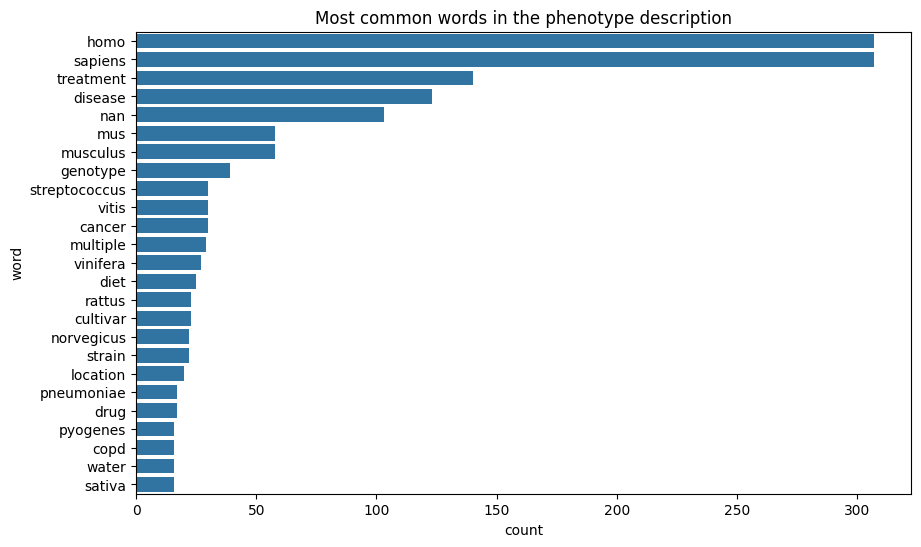

In [21]:
# keyword column

meta_df['phenotype description combined'] = meta_df['phenotype description combined'].str.lower()
meta_df['phenotype description combined'] = meta_df['phenotype description combined'].str.replace(':', ' ')
meta_df['phenotype description combined'] = meta_df['phenotype description combined'].str.replace(',', ' ')

keywords_list = ['cancer', 'cultivar', 'variety', 'location', 'disease', 'genotype', 'mutation',
                  'mutant', 'treatment', 'diet', 'infection', 'syndrome', 'birth', 'strain', 'copd', 'age', 'fasting']

keywords_convertion_dict = {
    'genotype'  : 'mutation',
    'mutation'  : 'mutation',
    'mutant'    : 'mutation',
    'infection' : 'disease',
    'syndrome'  : 'disease',
    'variety'   : 'cultivar',
    'strain'    : 'mutation',
    'copd'      : 'disease',
    'fasting'   : 'diet',
}

keywords_col = []
full_words_list = []



for d in meta_df['phenotype description combined']:
    loc_keyword = []
    words_in_d = d.split()
    selected_keyword = ''
    #if 'kimchi' in words_in_d:
    #    print(d)
    for keyword in keywords_list:
        if keyword in words_in_d:
            loc_keyword.append(keyword)
    if len(loc_keyword) > 1:
        # convert keywords
        loc_keyword = [keywords_convertion_dict[k] if k in keywords_convertion_dict else k for k in loc_keyword]
        if len(set(loc_keyword)) == 1:
            selected_keyword = loc_keyword[0]
        elif set(loc_keyword) == {'cancer', 'disease'}:
            selected_keyword = 'cancer'
        elif set(loc_keyword) == {'treatment', 'diet'}:
            selected_keyword = 'diet'
        elif set(loc_keyword) == {'birth', 'age'}:
            selected_keyword = 'birth'
        else:
            print(d, loc_keyword)
        #print(d, loc_keyword)
    elif len(loc_keyword) == 1:
        if loc_keyword[0] in keywords_convertion_dict:
            selected_keyword = keywords_convertion_dict[loc_keyword[0]]
        else:
            selected_keyword = loc_keyword[0]
    else:
        selected_keyword = 'other'
        #print(d)
    unique_words = list(set(words_in_d))
    full_words_list.extend(unique_words)
    keywords_col.append(selected_keyword)

meta_df['phenotype keyword'] = keywords_col

# remove words that are in the keywords_list
#full_words_list = [w for w in full_words_list if w not in keywords_list]

not_relevant_words = ['phenotype', 'description', 'values', 'healthy', 'cohort', 'with', 'of', 'or', 'no', 'yes', '0', '1', '2', '3', '+', 'stage',
                         'description', 'control', 'group', 'type', 'status', 'media', 'study', 'sample', 'hat', 'growth', 'pooled', 'sera',
                         'organism', 'time', 'rpmi', 'kimchi']
full_words_list = [w for w in full_words_list if w not in not_relevant_words]

# show the most common words
from collections import Counter
words_counter = Counter(full_words_list)
words_counter.most_common(25)

# draw a bag of words plot
words_df = pd.DataFrame.from_dict(words_counter, orient='index').reset_index()
words_df.columns = ['word', 'count']
words_df = words_df.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=words_df.head(25))
plt.title('Most common words in the phenotype description')
plt.show()



In [22]:
meta_df
# count the number of '?' by column
for c in meta_df.columns:
    if '?' in meta_df[c].values:
        print(c, meta_df[c].value_counts()['?'])


affiliation 6
release date 18
organism 103
baseline majoritary score 3
best univariate score 3
best method score 3
best algo name 3
best algo score 3
tendency 3
number of algos runned 835
technique category 10


In [23]:
# add the difference between the best algo score and the best univariate score
difference_list = []
for ml_score, uni_score in zip(meta_df['best algo score'], meta_df['best univariate score']):
    try:
        difference_list.append(ml_score - uni_score)
    except:
        difference_list.append(np.nan)
meta_df['difference ML univariate'] = difference_list
# drop the rows with nan on the difference
meta_df['absolute difference |ML - univariate|'] = meta_df['difference ML univariate'].abs()
meta_df['best overall score'] = meta_df[['best algo score', 'best univariate score']].max(axis=1)

In [24]:
meta_df['fatness'] = meta_df['n features'] / meta_df['n samples']
meta_df['is fat'] = meta_df['fatness'] > 1

In [25]:
meta_df['release date'] = pd.to_datetime(meta_df['release date'], errors='ignore')
year_col = []
for d in meta_df['release date']:
    try:
        year_col.append(int(d.split('-')[0]))
    except:
        year_col.append('?')

meta_df['release year'] = year_col

/tmp/ipykernel_18095/2494411707.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  meta_df['release date'] = pd.to_datetime(meta_df['release date'], errors='ignore')


In [26]:
# missing values in the release date
meta_df['release date'].isna().sum()

3

In [27]:
meta_df['tendency'].value_counts()

tendency
multivariate models performs better than univariate models    372
multivariate and univariate models are equivalent             270
univariate models performs better than multivariate models    177
no models performs better than the baseline                    13
?                                                               3
Name: count, dtype: int64

In [28]:
meta_df['difference rule-based - linear-based'] = meta_df['best rule-based algo score'] - meta_df['best linear-based algo score']
meta_df['structure of best method'] = meta_df[['best rule-based algo score', 'best linear-based algo score']].idxmax(axis=1)
meta_df['structure of best method'] = [{'best rule-based algo score': 'rule-based multivariate', '?': '?', 'best linear-based algo score': 'linear-based multivariate', np.nan: np.nan}[f] for f in meta_df['structure of best method']]
meta_df['structure of best method'] = [f if t == 'multivariate models performs better than univariate models' else 'univariate' for f, t in zip(meta_df['structure of best method'], meta_df['tendency'])]
meta_df['structure of best method'] = ['baseline' if t == 'no models performs better than the baseline' else f for f, t in zip(meta_df['structure of best method'], meta_df['tendency'])]

/tmp/ipykernel_18095/1735993407.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  meta_df['structure of best method'] = meta_df[['best rule-based algo score', 'best linear-based algo score']].idxmax(axis=1)


In [29]:
# save the meta_df
meta_df_filename = f'meta_df_{metric}.csv'

if not os.path.exists(meta_df_filename):
    meta_df.to_csv(meta_df_filename)
else:
    print('meta_df.csv already exists, are you sure you want to overwrite it? uncomment the next line to overwrite it')
    #meta_df.to_csv(meta_df_filename)

meta_df.csv already exists, are you sure you want to overwrite it? uncomment the next line to overwrite it
